<a href="https://colab.research.google.com/github/Seouyang/Today-I-Learned/blob/master/logistic_regression_and_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

In [ ]:
print(torch.cuda.is_available())

In [4]:
#MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./', train=False, transform=transforms.ToTensor())

#Data loader
train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Logistic regression 
Logistic regression is a kind of single layer neural network.

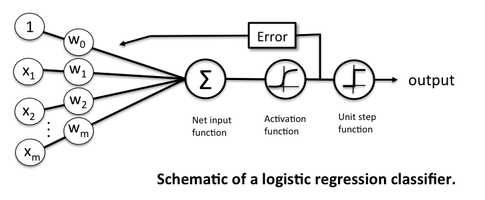

In [5]:
class Multinomial_logistic_regression(nn.Module):
  def __init__(self, input_size, output_size):
    super(Multinomial_logistic_regression, self).__init__()
    self.fc = nn.Linear(input_size, output_size)

  def forward(self, x):
    out = self.fc(x)
    return out

In [6]:
model = Multinomial_logistic_regression(784, 10)
model

Multinomial_logistic_regression(
  (fc): Linear(in_features=784, out_features=10, bias=True)
)

In [7]:
model = model.to('cuda')

In [8]:
#Optimizer define
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

In [9]:
#training
loss_fn = nn.CrossEntropyLoss()
total_step = len(train_loader)

for epoch in range(10):
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28).to('cuda')
    labels = labels.to('cuda')

    #forward
    outputs = model(images)
    loss = loss_fn(outputs, labels)

    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, 10, i+1, total_step, loss.item()))

Epoch [1/10], Step [100/469], Loss: 0.3318
Epoch [1/10], Step [200/469], Loss: 0.3021
Epoch [1/10], Step [300/469], Loss: 0.3264
Epoch [1/10], Step [400/469], Loss: 0.3925
Epoch [2/10], Step [100/469], Loss: 0.3167
Epoch [2/10], Step [200/469], Loss: 0.3484
Epoch [2/10], Step [300/469], Loss: 0.3375
Epoch [2/10], Step [400/469], Loss: 0.2203
Epoch [3/10], Step [100/469], Loss: 0.2376
Epoch [3/10], Step [200/469], Loss: 0.3475
Epoch [3/10], Step [300/469], Loss: 0.2735
Epoch [3/10], Step [400/469], Loss: 0.3972
Epoch [4/10], Step [100/469], Loss: 0.1696
Epoch [4/10], Step [200/469], Loss: 0.3397
Epoch [4/10], Step [300/469], Loss: 0.3669
Epoch [4/10], Step [400/469], Loss: 0.5867
Epoch [5/10], Step [100/469], Loss: 0.3101
Epoch [5/10], Step [200/469], Loss: 0.3386
Epoch [5/10], Step [300/469], Loss: 0.2643
Epoch [5/10], Step [400/469], Loss: 0.2459
Epoch [6/10], Step [100/469], Loss: 0.2250
Epoch [6/10], Step [200/469], Loss: 0.2108
Epoch [6/10], Step [300/469], Loss: 0.3551
Epoch [6/10

In [ ]:
#test
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to('cuda')
    labels = labels.to('cuda')
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1) #max returns max_elements, max_idxs. We used dim=1 to find the maximum along the rows
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print('Accuracy of the network on the 10000 test images: {} %'.format(100*correct/total))

# MLP (Multi-layer perceptron)
MLP is a neural network with multiple hidden layers.

In [11]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(NeuralNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.fc3 = nn.Linear(hidden_size, output_size)
    self.sigmoid = nn.Sigmoid()
  
  def forward(self, x):
    x = self.fc1(x)
    x = self.sigmoid(x)
    x = self.fc2(x)
    x = self.sigmoid(x)
    out = self.fc3(x)
    return out

In [12]:
model = NeuralNet(784, 20, 10)
model = model.to('cuda')

In [13]:
#training
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
total_step = len(train_loader)

for epoch in range(10):
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28).to('cuda')
    labels = labels.to('cuda')

    #forward
    outputs = model(images)
    loss = loss_fn(outputs, labels)

    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, 10, i+1, total_step, loss.item()))

Epoch [1/10], Step [100/469], Loss: 2.2636
Epoch [1/10], Step [200/469], Loss: 1.6955
Epoch [1/10], Step [300/469], Loss: 1.0655
Epoch [1/10], Step [400/469], Loss: 0.8552
Epoch [2/10], Step [100/469], Loss: 0.6617
Epoch [2/10], Step [200/469], Loss: 0.5099
Epoch [2/10], Step [300/469], Loss: 0.4677
Epoch [2/10], Step [400/469], Loss: 0.3045
Epoch [3/10], Step [100/469], Loss: 0.5173
Epoch [3/10], Step [200/469], Loss: 0.2599
Epoch [3/10], Step [300/469], Loss: 0.3116
Epoch [3/10], Step [400/469], Loss: 0.4061
Epoch [4/10], Step [100/469], Loss: 0.3193
Epoch [4/10], Step [200/469], Loss: 0.1540
Epoch [4/10], Step [300/469], Loss: 0.1412
Epoch [4/10], Step [400/469], Loss: 0.2230
Epoch [5/10], Step [100/469], Loss: 0.2229
Epoch [5/10], Step [200/469], Loss: 0.2728
Epoch [5/10], Step [300/469], Loss: 0.2357
Epoch [5/10], Step [400/469], Loss: 0.2102
Epoch [6/10], Step [100/469], Loss: 0.1623
Epoch [6/10], Step [200/469], Loss: 0.2182
Epoch [6/10], Step [300/469], Loss: 0.1899
Epoch [6/10

In [14]:
#test
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to('cuda')
    labels = labels.to('cuda')
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print('Accuracy of the network on the 10000 test images: {} %'.format(100*correct/total))

Accuracy of the network on the 10000 test images: 95.09 %
